In [1]:
from kSZ_forecast_general_func import *
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#Snapshot = 2448
Grid = 512
the_los=(45)*np.pi/180
n_rsd=np.array([np.cos(the_los),np.sin(the_los),0])
MAS = "NGP"
n_gal = 4*10**-4
#HOD_model = "HSC_NB912"
#HOD_model = "DESI"
HOD_random_seed = 100

In [4]:
pk_dm = np.zeros((2, 25))
pk_gal = np.zeros((2, 3, 25))
n_gal = np.zeros((2, 3))

Snapshots = [2448, 1631]
HOD_models = ["DESI", "HSC_NB816", "HSC_NB912"]

for ii in [0,1]:
    Snapshot = Snapshots[ii]
    Den_dir= "/home/chenzy/data/denmap/den"+MAS+"_"+str(Grid)+"_"+str(Snapshot)+"_0"
    denp=np.fromfile(Den_dir, dtype=np.float32, count=Grid**3, sep="").reshape((Grid,)*3)
    pk_dm[ii, :], k=fa.CalPS(denp   ,Grid,mapscale=(Boxlen/Grid**2)**3,kscale=2*np.pi/Boxlen)
    
    print("Read halos")
    halox,halov, mh =ReadHalos_np(zstep=Snapshot)
    halo_mass = mh*pm

    for jj in [0, 1, 2]:
        HOD_model = HOD_models[jj]
        print("Generate galaxy")
        if HOD_model == "DESI":
            richnezss = np.zeros(len(halo_mass), dtype = np.int32)
            for i in range(4):
                HOD_model = "DESI_L"+str(i)
                d = np.load("./halo_Temporary_storage/halos_"+str(Snapshot)+"_"+HOD_model+"_seed"+str(HOD_random_seed)+".npz")
                N_cen = d["N_cen"]
                N_sat = d["N_sat"]
                richness = N_cen + N_sat
        else:
            d = np.load("./halo_Temporary_storage/halos_"+str(Snapshot)+"_"+HOD_model+"_seed"+str(HOD_random_seed)+".npz")
            N_cen = d["N_cen"]
            N_sat = d["N_sat"]
            richness = N_cen + N_sat
        N_gal = np.sum(richness)
        n_gal[ii, jj] = N_gal/Boxlen**3
        print("Number of galaxies", N_gal,"   n=",N_gal/Boxlen**3)
        galaxy_pos_true = np.zeros((N_gal, 3))
        for i in range(3):
            galaxy_pos_true[:,i]=np.repeat(halox[:,i], richness)
            
        den_gal=den_NGP(galaxy_pos_true,Grid)
        pk_gal[ii, jj, :],k=fa.CalPS(den_gal,Grid,mapscale=(Boxlen/Grid**2)**3,kscale=2*np.pi/Boxlen)

Read halos
Generate galaxy
Number of galaxies 740089    n= 0.0004282922453703704
Generate galaxy
Number of galaxies 11005096    n= 0.006368689814814815
Generate galaxy
Number of galaxies 10744362    n= 0.006217802083333333
Read halos
Generate galaxy
Number of galaxies 565403    n= 0.0003272008101851852
Generate galaxy
Number of galaxies 6510771    n= 0.0037678072916666667
Generate galaxy
Number of galaxies 5574400    n= 0.003225925925925926


1.1733226298521744

1.7033490365814394

1.977598462277741

1.554603435234231

2.246707905066546

2.738680301891639



Text(0, 0.5, 'b(k)')

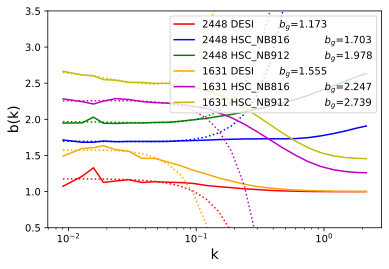

In [27]:
fig, ax = plt.subplots()
label = np.where(k<0.06)
c = [["r", "b", "g"],["orange", "m", "y"]]
for ii in [0, 1]:
    Snapshot = Snapshots[ii]
    for jj in [0, 1, 2]:
        HOD_model = HOD_models[jj]
        bk=np.sqrt(pk_gal[ii, jj, :]/(pk_dm[ii, :]+1/n_gal[ii, jj]))
        
        for i in [2]:
            pp=np.polyfit(k[label], bk[label], deg = i)
            f = np.poly1d(pp)
            print(pp[-1])
            plt.plot(k, f(k), ":",  c=c[ii][jj])
        fig_label = str(Snapshot)+" "+HOD_model+"    \t $b_g$="+str(np.round(pp[-1], 3))
        ax.plot(k, bk, c=c[ii][jj], label = fig_label)
        print()
ax.legend()
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_ylim(0.5, 3.5)
ax.set_xlabel("k", fontsize=14)
ax.set_ylabel("b(k)", fontsize=14)

In [21]:
len(label[0])

9

(1.0, 5.0)

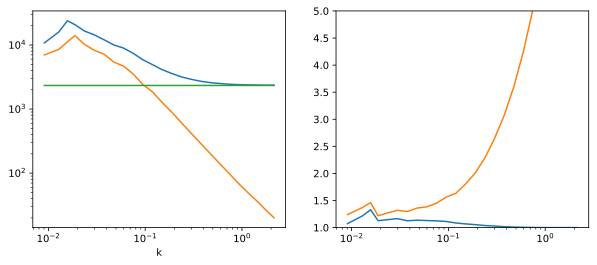

In [40]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].plot(k, pk_gal, label = "Gal "+HOD_model)
ax[0].plot(k, pk_dm, label = "dm")
ax[0].plot(k, np.ones(len(k))*1/n_gal)
ax[0].set_xlabel("k")
ax[0].set_xscale("log")
ax[0].set_yscale("log")

ax[1].plot(k, np.sqrt(pk_gal/(pk_dm+1/n_gal)))
ax[1].plot(k, np.sqrt(pk_gal/(pk_dm)))
ax[1].set_xscale("log")
ax[1].set_ylim(1, 5)